##  벡터

1. 벡터를 구성하는 숫자 하나하나를 요소라 부름
2. 여기에서는 벡터를 a,b와 같이 볼드체 소문자로 표시합니다.
3. 벡터에 대해 지금까지 살펴본 '일반적인 숫자의 묶음(집합)'을 스칼라라고 부릅니다.
4. T라는 기호는 벡터의 오른쪽위에 쓰이며
행을열으로 열을 행으로 변환한다는 의미입니다. 이 T를 전치라고 부릅니다.

###4.1.2 파이썬으로 벡터를 정의하기

In [0]:
import numpy as np

In [0]:
a = np.array([2,1]) # 1행 2열
print(a)

[2 1]


In [0]:
type(a)  # a의 형식

numpy.ndarray

## 4.1.3 세로 벡터를 나타내기

In [0]:
c = np.array([[1,2], [3,4]]) # 2행 2열
print(c)

[[1 2]
 [3 4]]


In [0]:
d = np.array([[1],[2]])  # 2행 1열
print(d)

[[1]
 [2]]


##4.1.4 전치를 나타내기

1. 변수명.T로 나타낸다.

In [0]:
print(d)      # 2행 1열
print(d.T)    # 1행 2열

[[1]
 [2]]
[[1 2]]


##4.1.5 덧셈과 뺄셈

In [0]:
a = np.array([2,1])
b = np.array([1,3])
print(a+b)
print(a-b)

[3 4]
[ 1 -2]


## 4.1.6 스칼라 곱셈

In [0]:
print(a)
print(2 * a)

[2 1]
[4 2]


## 4.1.7 내적
1. 내적은 같은 차원을 가진 두 벡터 간의 연산에서 "·"로 나타냅니다.
2. 내적은 두벡터간의 유사성과 관련이 있다.
3. 내적이 클수록 유사성이 크다. 상관계수↑

In [0]:
b = np.array([1,3]) 
c = np.array([4,2])
print(b.dot(c))  # 1x4 + 3x2 = 10

10


## 4.1.8 벡터의 크기 
1. 벡터의 크기는 |와| 사이에 나타냅니다.

In [0]:
a = np.array([1,3])
print(np.linalg.norm(a))

3.1622776601683795


## 4.2 합의 기호

## 4.2.2 합을 내적으로 계산하기

1. 합의 기호∑

In [0]:
import numpy as np
a = np.ones(1000) # [1,1,..,1] 1이 1000개
b = np.arange(1,1001) # [1,2,..,1000] 1부터 1000까지 수
print(a.dot(b))

500500.0


## 4.3 곱의 기호

1. 곱의기호 ∏

## 4.4 미분

머신러닝은 결국 함수에서 최소나 최대인 입력을 찾는 문제(최적화문제)입니다. 함수의 초소지점은 기울기가 0이 되는 성질이 있으므로 이러한 문제를 풀려면 함수의 기울기를 아는것이 중요합니다. 그 함수의 기울기를 도출하는 방법이 '미분'입니다.

## 4.4.2 미분 기호가 들어간 수식의 변형

미분의 기호 d/dw는 오른쪽에서만 작용합니다.

## 4.4.3 중첩된 함수의 미분

머신러닝은 중첩 함수의 미분이 많습니다.

## 4.4.4 중첩된 함수의 미분: 연쇄 법칙

1. 연쇄법칙의 공식 : df/dw = df/dgㆍdg/dw

## 4.5 편미분

머신러닝에서 실제로 사용하는 것은 순수한 미분이 아닌, 편미분입니다.

## 4.5.3 경사를 그림으로 나타내기



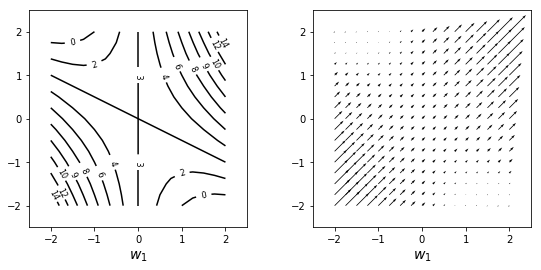

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

def f(w0, w1):
  return w0**2 + 2 * w0 *w1 + 3
def df_dw0(w0,w1):
  return 2 * w0 + 2 * w1
def df_dw1(w0,w1):
  return 2*w1

w_range = 2
dw = 0.25

w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0]
ww0, ww1 = np.meshgrid(w0,w1)
ff = np.zeros((len(w0), len(w1)))
dff_dw0 = np.zeros((len(w0), len(w1)))
dff_dw1 = np.zeros((len(w0), len(w1)))

for i0 in range(wn):
  for i1 in range(wn):
    ff[i1, i0] = f(w0[i0], w1[i1])
    dff_dw0[i1, i0] = f(w0[i0], w1[i1])
    dff_dw1[i1, i0] = f(w0[i0], w1[i1])
    
plt.figure(figsize=(9,4))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
cont = plt.contour(ww0, ww1, ff, 10, colors='k')
cont.clabel(fmt='%2.0f', fontsize=8)
plt.xticks(range(-w_range, w_range +1, 1))
plt.yticks(range(-w_range, w_range +1, 1))
plt.xlim(-w_range -0.5, w_range + .5)
plt.ylim(-w_range -0.5, w_range + .5)
plt.xlabel('$w_0$', fontsize=14)
plt.xlabel('$w_1$', fontsize=14)

plt.subplot(1,2,2)
plt.quiver(ww0,ww1, dff_dw0, dff_dw1)
plt.xlabel('$w_0$', fontsize=14)
plt.xlabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range +1, 1))
plt.yticks(range(-w_range, w_range +1, 1))
plt.xlim(-w_range -0.5, w_range + .5)
plt.ylim(-w_range -0.5, w_range + .5)
plt.show()

## 4.5.4 다변수의 중첩 함수의 미분



## 4.5.5 합과 미분의 교환

## 4.6 행렬

1. 행렬을 사용하면 많은 연립 방정식을 하나의 식으로 나타낼 수 있음.
2. 행렬과 벡터에서 식을 나타내면, 직관적인 통찰에 도움이 됨.

## 4.6.1 행렬이란

숫자를 수직이나 수평으로 배열한 것을 '벡터'라고 했지만, 가로 세로로 표처럼 늘어 놓은것을 행렬로 부릅니다.

## 4.6.2 행렬의 덧셈과 뺄셈



In [0]:
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
print(A)

In [0]:
B = np.array([[7,8,9],[10,11,12]])
print(B)

In [0]:
print(A+B)  # 두 행렬의 합
print(A-B)  # 두 행렬의 차

## 4.6.3 스칼라 배

In [0]:
A = np.array([[1,2,3,],[4,5,6]])
print(2*A)

## 4.6.4 행렬의 곱


In [0]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print(A.dot(B)) #내적 1x4 + 2x5 + 3x6 = 32

In [0]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print(A*B) #곱 [1x4, 2x5, 3x6]

In [0]:
A=np.array([1,2,3])
B=np.array([4,5,6])
print(A/B) #나숫셈 [1/4, 2/5, 3/6]

In [0]:
A = np.array([[1,2,3],[-1,-2,-3]])
B = np.array([[4,-4], [5,-5],[6,-6]])
print(A.dot(B)) #A(2x3) * B(3,2) = 2x2 행렬

## 4.6.5 단위 행렬

1. 정방 행렬인 경우 대각선 성분이 1이고,
그외에는 0인 특별한 행렬을 I로 나타냄


In [0]:
print(np.identity(3)) # 정방 행렬

In [0]:
A = np.array([[1,2,3,],[4,5,6],[7,8,9]])
I = np.identity(3) # 대각선 1의 개수가 3개인 단위 행렬 생성 
print(A.dot(I)) # A * I = A (단위행렬 내적)

## 4.6.6 역행렬

1. 행렬의 나누기를 생가갑니다. 스칼라 경우 3으로 나누면 3의 역수인 1/3을 곱하는 것과 같습니다.
2. 역수는 곱하면 1이 되는 수입니다.
3. a의 역수는 1/a이며 a^-1로 나타낼 수 있습니다.



In [0]:
A = np.array([[1,2],[3,4]])
invA = np.linalg.inv(A)
print(invA)

## 4.6.7 전치
1. 세로 벡터를 가로로, 가로벡터를 세로로 만드는 연산자 전치 T

In [0]:
A = np.array([[1,2,3,],[4,5,6]])
print(A)   # 가로 벡터
print(A.T) # 전치(세로 벡터)

## 4.6.8 행렬과 연립 방정식

행렬을 사용하면 많은 연립방적식을 하나의 식으로 나타낼 수 있는 장점이 있다.